In [15]:
import numpy as np
import matplotlib.pyplot as plt
def distance(x1, y1, x2, y2):
    ans=abs((x2-x1)+(y2-y1))
    return ans
n=4
#n=int(input("Enter the number of positive data points: "))
p_pts=[(4,0),(5,-1),(5,1),(6,0)]
n_pts=[(1,-1),(1,1),(1,2),(2,1)]
sv=[]
d=[]
for i in p_pts:
    for j in n_pts:
        d.append((distance(i[0],i[1],j[0],j[1]),i[0],i[1],j[0],j[1]))
md=min(d,key=lambda v: (v[0]))
a=md[1]
b=md[3]
sv.extend(((md[1],md[2]),(md[3],md[4])))
for i in range(n):
    if(p_pts[i][0]==a or p_pts[i][0]==b):
        sv.append(p_pts[i])
    elif(n_pts[i][0]==a or n_pts[i][0]==b):
        sv.append(n_pts[i])
t=list(set(sv))
c=[]
for i in t:
    if(i in p_pts):
        c.append(1)
    else:
        c.append(-1)
w=[]

if(len(t)==3):
    sv1=[t[0][0],t[0][1],1],[t[1][0],t[1][1],1],[t[2][0],t[2][1],1]
    sv2=[t[0][0],t[0][1]],[t[1][0],t[1][1]],[t[2][0],t[2][1]]
    a1=[np.dot(sv1[0],sv1[0]),np.dot(sv1[1],sv1[0]),np.dot(sv1[2],sv1[0])]
    a2=[np.dot(sv1[0],sv1[1]),np.dot(sv1[1],sv1[1]),np.dot(sv1[2],sv1[1])]
    a3=[np.dot(sv1[0],sv1[2]),np.dot(sv1[1],sv1[2]),np.dot(sv1[2],sv1[2])]
    A=np.array([a1,a2,a3])
    x=np.linalg.solve(A,c)
    w.append(x[0]*sv1[0][0]+x[1]*sv1[1][0]+x[2]*sv1[2][0])
    w.append(x[0]*sv1[0][1]+x[1]*sv1[1][1]+x[2]*sv1[2][1])
    w.append(x[0]*sv1[0][2]+x[1]*sv1[1][2]+x[2]*sv1[2][2])

if(len(t)==4):
    sv1=[t[0][0],t[0][1],1],[t[1][0],t[1][1],1],[t[2][0],t[2][1],1],[t[3][0],t[3][1],1]
    a1=[np.dot(sv1[0],sv1[0]),np.dot(sv1[1],sv1[0]),np.dot(sv1[2],sv1[0]),np.
    dot(sv1[3],sv1[0])]
    a2=[np.dot(sv1[0],sv1[1]),np.dot(sv1[1],sv1[1]),np.dot(sv1[2],sv1[1]),np.
    dot(sv1[3],sv1[1])]
    a3=[np.dot(sv1[0],sv1[2]),np.dot(sv1[1],sv1[2]),np.dot(sv1[2],sv1[2]),np.
    dot(sv1[3],sv1[2])]
    a4=[np.dot(sv1[0],sv1[3]),np.dot(sv1[1],sv1[3]),np.dot(sv1[2],sv1[3]),np.
    dot(sv1[3],sv1[3])]
    A=np.array([a1,a2,a3,a4])
    x=np.linalg.solve(A,c)
    w.append(x[0]*sv1[0][0]+x[1]*sv1[1][0]+x[2]*sv1[2][0]+sv1[3]*sv1[3][0])
    w.append(x[0]*sv1[0][1]+x[1]*sv1[1][1]+x[2]*sv1[2][1]+sv1[3]*sv1[3][1])
    w.append(x[0]*sv1[0][2]+x[1]*sv1[1][2]+x[2]*sv1[2][2]+sv1[3]*sv1[3][2])

if(w[0]==1):
    w1=[int(w[0]),int(w[1])]
    b=round(w[2],4)
else:
    w1=[int(w[0]/w[0]),int(w[1]/w[0])]
    b=round(w[2]/w[0],4)
print("\nPositive data points: ",p_pts)
print("Negative data points: ",n_pts)
print("SVM Vector :" , sv2)
print("Hyperplane equation is: y=",w1,"x + ",b)


Positive data points:  [(4, 0), (5, -1), (5, 1), (6, 0)]
Negative data points:  [(1, -1), (1, 1), (1, 2), (2, 1)]
SVM Vector : ([1, 1], [1, 2], [4, 0])
Hyperplane equation is: y= [1, 0] x +  -2.5


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dataset=pd.read_csv('datasets\SVM.csv')
x=dataset.iloc[:, 2:-1].values
y=dataset.iloc[:, -1].values




In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=0)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [22]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)
classifier.predict(sc.transform([[30,87000]]))
y_pred=classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))



[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]]


In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy Score: ',accuracy_score(y_test,y_pred))



[[70  2]
 [10 26]]
Accuracy Score:  0.8888888888888888


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


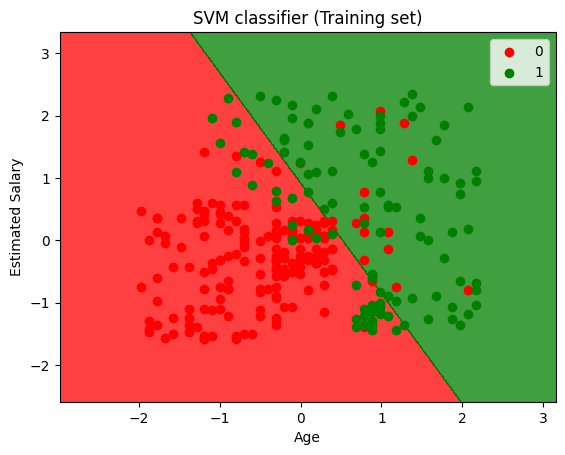

In [25]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red', 'green')))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
plt.title('SVM classifier (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


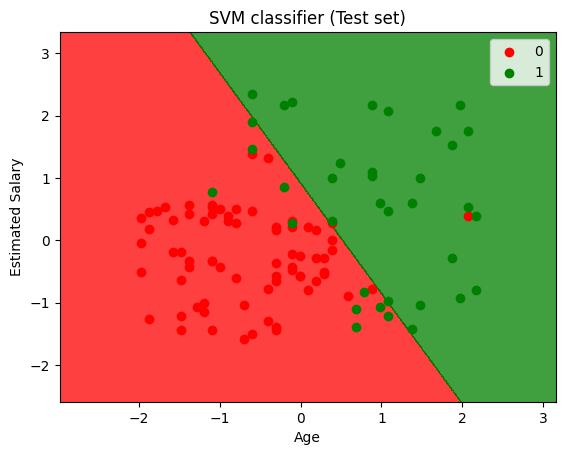

In [26]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
plt.title('SVM classifier (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  